In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:

test = pd.read_csv("C:\\Users\\shrey\\Downloads\\fraudTest.csv\\fraudTest.csv")

data = pd.concat([test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [48]:
print(test.shape)

(555719, 23)


In [49]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [50]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
   
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [52]:
print(data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [53]:
# Convert 'unix_time' to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['unix_time'], unit='s')

# Check if 'dob' or birth-related columns are available and adjust accordingly
# Skip the 'dob' conversion step if no 'dob' column is found
if 'dob' in data.columns:
    data['dob'] = pd.to_datetime(data['dob'])
    data['birth_year'] = data['dob'].dt.year
    data['birth_month'] = data['dob'].dt.month
    data['birth_day'] = data['dob'].dt.day
    data.drop(['dob'], axis=1, inplace=True)  # Drop 'dob' after extraction

# Extract year, month, day, and hour from 'trans_date_trans_time'
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

# Drop the 'trans_date_trans_time' column after extraction
data.drop(['trans_date_trans_time'], axis=1, inplace=True)


# Convert 'unix_time' to datetime in the test set
test['trans_date_trans_time'] = pd.to_datetime(test['unix_time'], unit='s')

# Check if 'dob' or birth-related columns are available in the test set
if 'dob' in test.columns:
    test['dob'] = pd.to_datetime(test['dob'])
    test['birth_year'] = test['dob'].dt.year
    test['birth_month'] = test['dob'].dt.month
    test['birth_day'] = test['dob'].dt.day
    test.drop(['dob'], axis=1, inplace=True)  # Drop 'dob' after extraction

# Extract year, month, day, and hour from 'trans_date_trans_time' in the test set
test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour

# Drop the 'trans_date_trans_time' column after extraction in the test set
test.drop(['trans_date_trans_time'], axis=1, inplace=True)


In [54]:
print(data.columns)
print(test.columns)


Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'birth_year', 'birth_month', 'birth_day', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour'],
      dtype='object')
Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'birth_year', 'birth_month', 'birth_day', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour'],
      dtype='object')


In [55]:
# Drop columns in 'data' DataFrame if they exist
columns_to_drop = ['first', 'last', 'street', 'city', 'trans_num']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)

# Drop columns in 'test' DataFrame if they exist
test.drop(columns=[col for col in columns_to_drop if col in test.columns], axis=1, inplace=True)


In [56]:
print(test.shape)
print(data.shape)

(555719, 23)
(555719, 23)


In [57]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, birth_year, birth_month, birth_day, transaction_year, transaction_month, transaction_day, transaction_hour]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category    amt  gender  state  \
0           0  2291163933867244       319        10   2.86       1     39   
1           1  3573030041201292       591        10  29.84       0     43   
2           2  3598215285024754       611         5  41.28       0     33   
3           3  3591919803438423       222         9  60.05       1      8   
4           4  3526826139003047       292        13   3.19       1     21   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  birth_year  \
0  29209  33.9659  -80.9355  ...  33.986391  -81.200714         0        1968   
1  84002  40.3207 -110.4360  ...  39.450498 -109.960431         0        

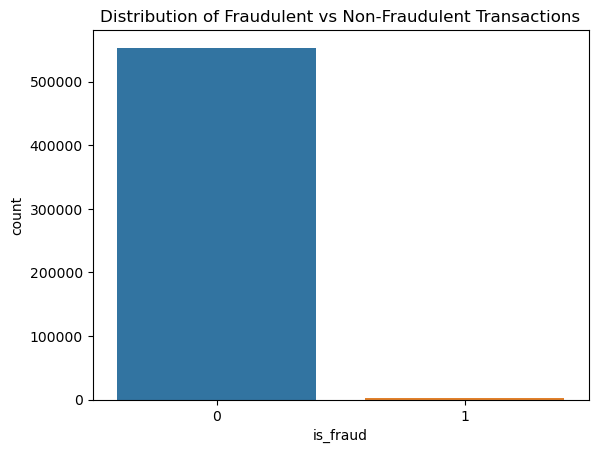

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [59]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

0
0


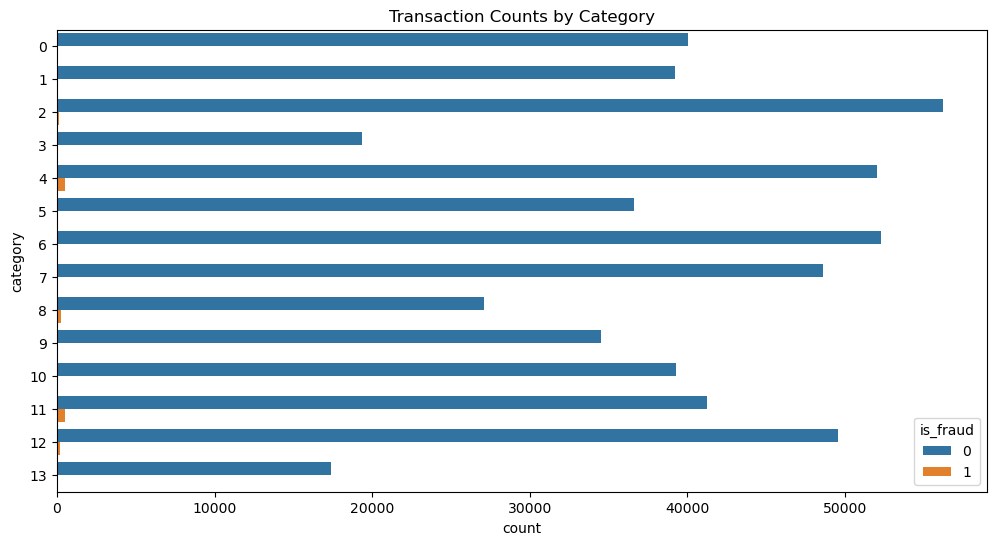

In [65]:
# Convert 'is_fraud' to string or category
data['is_fraud'] = data['is_fraud'].astype(str)

# Now plot
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category')
plt.xticks(rotation=0)
plt.show()




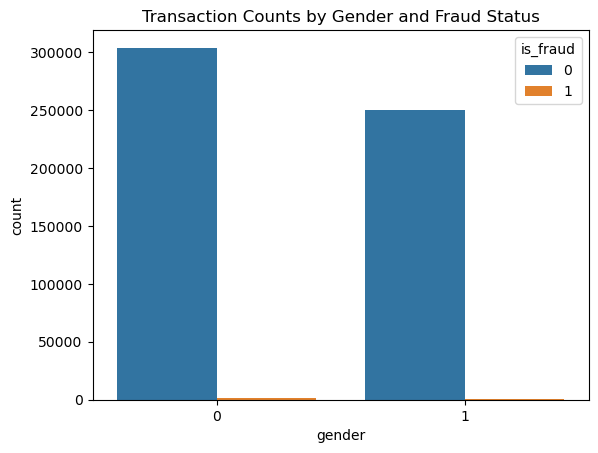

In [66]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

In [78]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with class weights to handle imbalance
log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = log_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96    110718
           1       0.04      0.78      0.07       426

    accuracy                           0.93    111144
   macro avg       0.52      0.86      0.52    111144
weighted avg       1.00      0.93      0.96    111144

[[102552   8166]
 [    92    334]]
Accuracy: 0.9256999928021306
ROC-AUC: 0.890459304173094


In [83]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.72      0.79      0.75       426

    accuracy                           1.00    111144
   macro avg       0.86      0.89      0.87    111144
weighted avg       1.00      1.00      1.00    111144

[[110586    132]
 [    91    335]]
Accuracy: 0.9979935938962067


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with class weights and increase max_iter
lr_model = LogisticRegression(max_iter=2000, class_weight='balanced', solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1]))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    110718
           1       0.04      0.78      0.07       426

    accuracy                           0.93    111144
   macro avg       0.52      0.86      0.52    111144
weighted avg       1.00      0.93      0.96    111144

Confusion Matrix:
[[102552   8166]
 [    92    334]]
Accuracy: 0.9256999928021306
ROC-AUC: 0.890459304173094


In [89]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import pandas as pd

# Load your dataset (example)
# data = pd.read_csv('path_to_data.csv')

# Define features (X) and target (y)
X = data.drop('is_fraud', axis=1)  # Assuming 'is_fraud' is the target column
y = data['is_fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train the Logistic Regression model with balanced class weights and a higher max_iter
lr_model = LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced')
lr_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

# Display the results
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC-AUC score
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    110718
           1       0.04      0.79      0.07       426

    accuracy                           0.92    111144
   macro avg       0.52      0.85      0.52    111144
weighted avg       1.00      0.92      0.96    111144

Confusion Matrix:
[[102221   8497]
 [    91    335]]
Accuracy: 0.9227308716619881
AUC-ROC: 0.8906776400256218
